In [3]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def get_sig_data_dict(data_file):
    
    data_dict = {}
    data_p_dict = {'up': [], 'down': []}
    data_m_dict = {'up': [], 'down': []}
    data_aa_dict = {'up': [], 'down': []}
    
    data_df = pd.read_csv(data_file, sep = "\t", index_col = 0)
    r, c = data_df.shape
    feature_list = data_df.index.values
    
    for i in range(r):
        feature = feature_list[i]
        cohen_d = data_df.iloc[i][1]
        pval = data_df.iloc[i][2]
        
        if feature != "age":
            if 'aa_' in feature:
                if pval < 0.05:
                    if cohen_d > 0.5:
                        data_dict[feature] = [cohen_d, pval]
                        data_aa_dict['up'].append(feature)                
                    if cohen_d < -0.5:
                        data_dict[feature] = [cohen_d, pval]
                        data_aa_dict['down'].append(feature)
            else:
                if pval < 0.01:
                    if cohen_d > 0.5:
                        data_dict[feature] = [cohen_d, pval]
                        if 'p_' in feature:
                            data_p_dict['up'].append(feature)                
                        else:
                            data_m_dict['up'].append(feature)                

                    if cohen_d < -0.5:
                        data_dict[feature] = [cohen_d, pval]
                        if 'p_' in feature:
                            data_p_dict['down'].append(feature)                
                        else:
                            data_m_dict['down'].append(feature)

    return data_dict, data_p_dict, data_m_dict, data_aa_dict
    
def make_venndiagram(low_omics_dict, high_omics_dict, omics_type, updown_status, comparison_type, seta, setb):
    
    if updown_status == "up":
        intersection_list = list(set(low_omics_dict["up"]) & set(high_omics_dict["up"]))
        uniq_in_low_age_list = list(set(low_omics_dict["up"]) - set(high_omics_dict["up"]))
        uniq_in_high_age_list = list(set(high_omics_dict["up"]) - set(low_omics_dict["up"]))
        
    if updown_status == "down":
        intersection_list = list(set(low_omics_dict["down"]) & set(high_omics_dict["down"]))
        uniq_in_low_age_list = list(set(low_omics_dict["down"]) - set(high_omics_dict["down"]))
        uniq_in_high_age_list = list(set(high_omics_dict["down"]) - set(low_omics_dict["down"]))

    output_pdf = '../../../analysis/age_stratified/differential_abundance_v2/plot/%s.%s.%s.%s.%s.pdf' % (omics_type, comparison_type, updown_status, seta, setb)
    venn2(subsets = (len(uniq_in_low_age_list), len(uniq_in_high_age_list), len(intersection_list), ), set_labels = (seta, setb))
    plt.title('%s:%s, population:%s vs. %s \n%s in disease' % (omics_type, comparison_type, seta, setb, updown_status))
    plt.savefig(output_pdf)
    plt.clf()
    
    output_file = '../../../analysis/age_stratified/differential_abundance_v2/plot/%s.%s.%s.%s.%s.tsv' % (omics_type, comparison_type, updown_status, seta, setb)
    output_txt = open(output_file, 'w')
    output_txt.write('Intersection')
    for feature in intersection_list:
          output_txt.write('\t%s' % feature)
    output_txt.write('\n')
          
    output_txt.write('Uniq in %s' % seta)
    for feature in uniq_in_low_age_list:
          output_txt.write('\t%s' % feature)
    output_txt.write('\n')
          
    output_txt.write('uniq in %s' % setb)
    for feature in uniq_in_high_age_list:
          output_txt.write('\t%s' % feature)
    output_txt.write('\n')
    
def make_significant_feature_report(age_omics_dict, omics_type, comparison_type, age_type):
    
    output_file = '../../../analysis/age_stratified/differential_abundance_v2/feature_report/%s.%s.%s.tsv' % (omics_type, comparison_type, age_type)
    output_txt = open(output_file,'w')
    
    output_txt.write('UP')
    for feature in age_omics_dict["up"]:
        if 'p_' in feature:
            feature = feature.replace('p_','')
        if 'aa_' in feature:
            feature = feature.replace('aa_','')
            
        output_txt.write('\t%s' % feature)
    output_txt.write('\n')
    
    output_txt.write('DOWN')
    for feature in age_omics_dict["down"]:
        if 'p_' in feature:
            feature = feature.replace('p_','')
        if 'aa_' in feature:
            feature = feature.replace('aa_','')
            
        output_txt.write('\t%s' % feature)
    output_txt.write('\n')
    
    
    

FileNotFoundError: [Errno 2] No such file or directory: '../../../analysis/age_stratified/differential_abundance_v2/plot/protein.negVSpos.up.young.old.pdf'

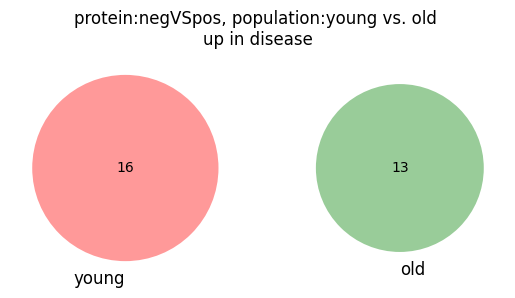

In [5]:
data_dir = '../../../analysis/age_stratified/differential_abundance_v2/'
# comparison_list = ['cVSneg','cVSpos','cVSra','negVSpos']
comparison_list = ['negVSpos']

for comparison_type in comparison_list:
    
    high_age_file = '%shigh_age.%s.padj.tsv' % (data_dir, comparison_type)
    med_age_file = '%smid_age.%s.padj.tsv' % (data_dir, comparison_type)
    low_age_file = '%slow_age.%s.padj.tsv' % (data_dir, comparison_type)
    
    high_dict, high_p_dict, high_m_dict, high_aa_dict = get_sig_data_dict(high_age_file)
    low_dict, low_p_dict, low_m_dict, low_aa_dict = get_sig_data_dict(low_age_file)
    # med_dict, med_p_dict, med_m_dict, med_aa_dict, med_etc_dict = get_sig_data_dict(med_age_file)

    #p   
    make_venndiagram(low_p_dict, high_p_dict, "protein", "up", comparison_type, 'young','old')
    make_venndiagram(low_p_dict, high_p_dict, "protein", "down", comparison_type, 'young','old')
    
    make_significant_feature_report(low_p_dict, "proteomics", comparison_type, "young")
    make_significant_feature_report(high_p_dict, "proteomics", comparison_type, "old")

    #m
    make_venndiagram(low_m_dict, high_m_dict, "metabolite", "up", comparison_type, 'young','old')
    make_venndiagram(low_m_dict, high_m_dict, "metabolite", "down", comparison_type, 'young','old')
    
    make_significant_feature_report(low_m_dict, "metabolite", comparison_type, "young")
    make_significant_feature_report(high_m_dict, "metabolite", comparison_type, "old")

    
    #aa
    make_venndiagram(low_aa_dict, high_aa_dict, "autoantibody", "up", comparison_type, 'young','old')
    make_venndiagram(low_aa_dict, high_aa_dict, "autoantibody", "down", comparison_type, 'young','old')
    
    make_significant_feature_report(low_aa_dict, "autoantibody", comparison_type, "young")
    make_significant_feature_report(high_aa_dict, "autoantibody", comparison_type, "old")

    
    # break